# Numerical Exercises 04

## Exercise 04.1

In Statistical Mechanics the Maxwell–Boltzmann distribution (<a href="https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution" target="_blank">Link Wikipedia</a>) is a probability distribution used for describing particle speeds in idealized gases. However, rarefied gases at ordinary temperatures behave very nearly like an ideal gas and the Maxwell–Boltzmann speed distribution is an excellent approximation for such gases. For a 3D system its formula is:
$$p(v,T) = \left( \frac{m}{2\pi k_B T} \right)^{3/2} 4\pi v^2 e^{-\frac{m v^2}{2 k_B T}}$$

By using LJ reduced units (Lenght: $\sigma$; Energy: $\epsilon$; Mass: the mass, $m$, of the particles; Temperature: $\epsilon/k_B$; velocity: $\sqrt{\epsilon/m}$) its form becomes:
$$p(v^*,T^*) = \frac{1}{(2\pi T^*)^{3/2}} 4\pi (v^*)^2 e^{-\frac{(v^*)^2}{2 T^*}}$$

The NSL_SIMULATOR code already computes the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$.

<span style="color:red">Include the calculation of the Maxwell–Boltzmann distribution, $p(v^*,T^*)$, inside your Molecular Dynamics code by using data blocking to obtain single block averages, progressive average values and progressive uncertainties for $p(v^*,T^*)$.</span>

Remember that, the Maxwell–Boltzmann distribution, $p(v^*,T^*)$, can be approximately computed as a **normalized histogram** on an appropriate interval $\left[ 0, v_{max}\right]$ and chosing the number of bins into which you want to divide this interval.

### Solution

Per misurare la distribuzione delle velocità 

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib.cm as cm

warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 10

## Exercise 4.1

In [2]:
data = pd.read_csv('NSL_SIMULATOR/OUTPUT/pofv_4.1.dat', delim_whitespace=True)
data.fillna(0, inplace=True)

data

,#VELOCITY:,AVE_POFV:,PROGR_AVE_POVF:,ERROR:
0,0.094281,0.000000,0.000000,0.000000
1,0.282843,0.000023,0.002500,0.000000
2,0.471405,0.005519,0.596000,0.000000
3,0.659966,0.016292,1.759500,0.000000
4,0.848528,0.018690,2.018500,0.000000
...,...,...,...,...
595,4.808330,0.008741,0.531600,0.090321
596,4.996890,0.005815,0.384300,0.072070
597,5.185450,0.004111,0.170050,0.039094
598,5.374010,0.000778,0.162150,0.057684


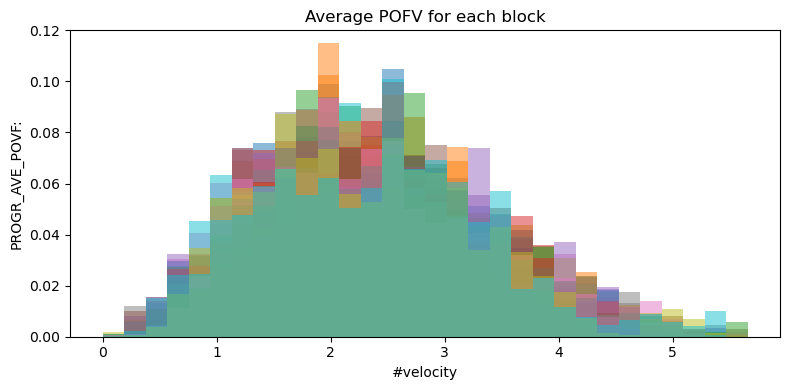

In [3]:
fig, ax = plt.subplots(figsize=(8, 4))

width = data['#VELOCITY:'][1] - data['#VELOCITY:'][0]

reference = [0] * 30
bin_index = int((3 * 2)**0.5 / width) 
reference[bin_index] = 1
#ax.bar(data['#VELOCITY:'][:30], reference, width=width, alpha=0.5, color='red', label='Delta Reference')

for i in range(len(data) // 30):
    start_idx = i * 30
    end_idx = start_idx + 30
    subset = data.iloc[start_idx:end_idx]
    ax.bar(subset['#VELOCITY:'], subset['AVE_POFV:'],width=width, alpha=0.5, label=f'Block {i+1}')

ax.set_title('Average POFV for each block')
ax.set_xlabel('#velocity')
ax.set_ylim(0, 0.12)
ax.set_ylabel('PROGR_AVE_POVF:')

plt.tight_layout()
plt.show()

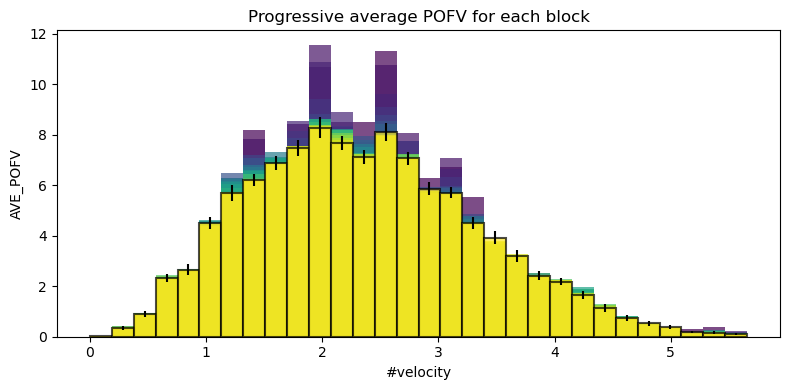

In [4]:
fig, ax = plt.subplots(figsize=(8, 4))

num_blocks = len(data) // 30
colors = cm.viridis(np.linspace(0, 1, num_blocks))

for i in range(num_blocks):
    start_idx = i * 30
    end_idx = start_idx + 30
    subset = data.iloc[start_idx:end_idx]

    if i != num_blocks - 1:
        ax.bar(subset['#VELOCITY:'], subset['PROGR_AVE_POVF:'], alpha=0.7, color=colors[i], label=f'Block {i+1}', width=width)
    else:
        ax.bar(subset['#VELOCITY:'], subset['PROGR_AVE_POVF:'], yerr=subset['ERROR:'], linewidth=1.5, edgecolor='black', alpha=0.7, color=colors[i], label=f'Block {i+1}', width=width)

ax.set_title('Progressive average POFV for each block')
ax.set_xlabel('#velocity')
ax.set_ylabel('AVE_POFV')
plt.tight_layout()
plt.show()

## Exercise 4.2

In [5]:
data_delta = pd.read_csv('NSL_SIMULATOR/OUTPUT/pofv_4.2.dat', delim_whitespace=True)
data_delta.fillna(0, inplace=True)

data_delta

,#VELOCITY:,AVE_POFV:,PROGR_AVE_POVF:,ERROR:
0,0.094281,0.000167,0.009000,0.006364
1,0.282843,0.001315,0.071000,0.050205
2,0.471405,0.002315,0.125000,0.088388
3,0.659966,0.002282,0.123250,0.087151
4,0.848528,0.004000,0.216000,0.152735
...,...,...,...,...
1165,4.808330,0.003273,0.419800,0.049010
1166,4.996890,0.009449,0.362387,0.060080
1167,5.185450,0.010560,0.275313,0.047538
1168,5.374010,0.004602,0.177875,0.039378


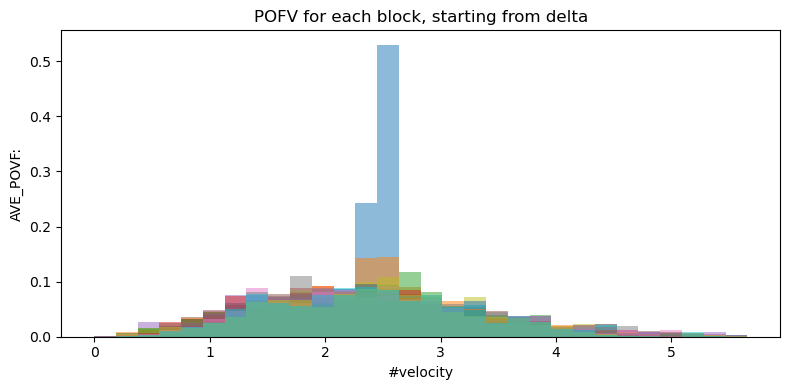

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))

width = data_delta['#VELOCITY:'][1] - data_delta['#VELOCITY:'][0]

for i in range(len(data) // 30):
    start_idx = i * 30
    end_idx = start_idx + 30
    subset = data_delta.iloc[start_idx:end_idx]
    ax.bar(subset['#VELOCITY:'], subset['AVE_POFV:'],width=width, alpha=0.5, label=f'Block {i+1}')

ax.set_title('POFV for each block, starting from delta')
ax.set_xlabel('#velocity')
ax.set_ylabel('AVE_POVF:')
plt.tight_layout()
plt.show()

Temperatura di Boltzmann nel fit: 1.9170422247597496


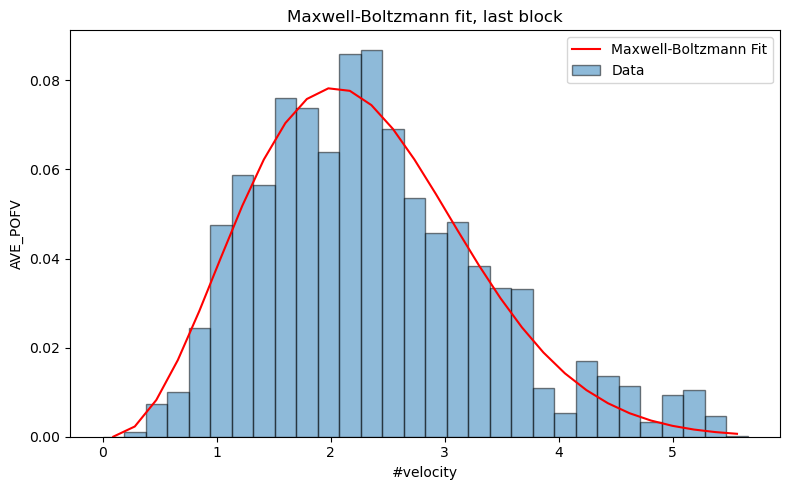

In [7]:
from scipy.stats import maxwell
from scipy.optimize import curve_fit
import numpy as np

velocity = data_delta['#VELOCITY:'][-30:]
pofv = data_delta['AVE_POFV:'][-30:]

def maxwell_boltzmann(x, a, loc, scale):
    return a * maxwell.pdf(x, loc=loc, scale=scale)

params, _ = curve_fit(maxwell_boltzmann, velocity, pofv, p0=[1, 0, 1])

a_fit, loc_fit, scale_fit = params
boltzmann_temperature = scale_fit**2
print(f"Temperatura di Boltzmann nel fit: {boltzmann_temperature}")

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(velocity, pofv, width=width, linewidth = 1. ,edgecolor = 'black',alpha=0.5, label='Data')
ax.plot(velocity, maxwell_boltzmann(velocity, *params), color='red', label='Maxwell-Boltzmann Fit')
ax.set_title('Maxwell-Boltzmann fit, last block')
ax.set_xlabel('#velocity')
ax.set_ylabel('AVE_POFV')
ax.legend()

plt.tight_layout()
plt.show()


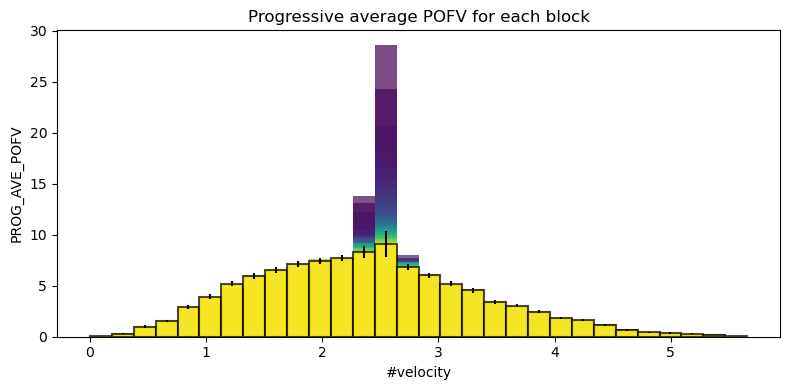

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))

num_blocks = len(data_delta) // 30
colors = cm.viridis(np.linspace(0, 1, num_blocks))

for i in range(num_blocks):
    start_idx = i * 30
    end_idx = start_idx + 30
    subset = data_delta.iloc[start_idx:end_idx]

    if i != num_blocks - 1:
        ax.bar(subset['#VELOCITY:'], subset['PROGR_AVE_POVF:'], alpha=0.7, color=colors[i], label=f'Block {i+1}', width=width)
    else:
        ax.bar(subset['#VELOCITY:'], subset['PROGR_AVE_POVF:'], yerr=subset['ERROR:'], linewidth=1.5, edgecolor='black', alpha=0.7, color=colors[i], label=f'Block {i+1}', width=width)

ax.set_title('Progressive average POFV for each block')
ax.set_xlabel('#velocity')
ax.set_ylabel('PROG_AVE_POFV')
plt.tight_layout()
plt.show()

ATTENZIONE: questo plot non è normalizzato?

## Exercise 4.3


In [9]:
blocks = 50

data_potential = pd.read_csv('NSL_SIMULATOR/OUTPUT/potential_energy.dat', delim_whitespace=True)
data_temperature = pd.read_csv('NSL_SIMULATOR/OUTPUT/temperature.dat', delim_whitespace=True)
data_potential.fillna(0, inplace=True)
data_temperature.fillna(0, inplace=True)

In [10]:
potential_forward = data_potential.iloc[0:blocks]    
potential_forward.fillna(0, inplace=True)
potential_backward = data_potential.iloc[blocks:2*blocks]

temperature_forward = data_temperature.iloc[0:blocks]
temperature_forward.fillna(0, inplace=True)
temperature_backward = data_temperature.iloc[blocks:2*blocks]

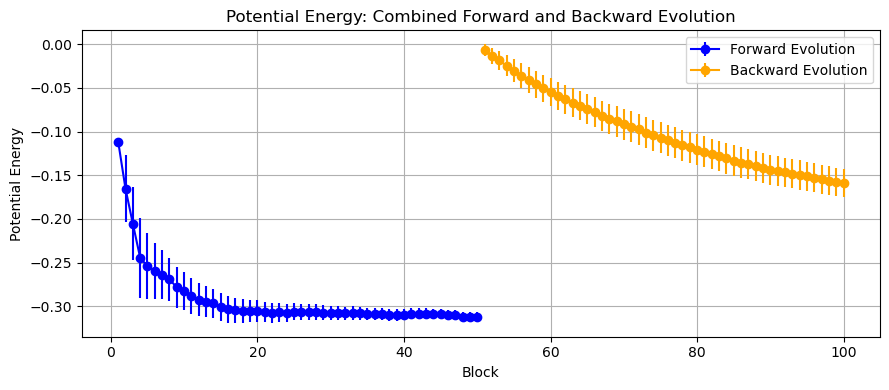

In [11]:
fig, ax = plt.subplots(figsize=(9, 4))

combined_blocks = list(range(1, blocks+1)) + list(range(blocks+1, 2*blocks+1))

ax.errorbar(combined_blocks[:blocks], potential_forward['PE_AVE:'], yerr=potential_forward['ERROR:'], label='Forward Evolution', marker='o', color='blue')
ax.errorbar(combined_blocks[blocks:], potential_backward['PE_AVE:'], yerr=potential_backward['ERROR:'], label='Backward Evolution', marker='o', color='orange')

ax.set_title('Potential Energy: Combined Forward and Backward Evolution')
ax.set_xlabel('Block')
ax.set_ylabel('Potential Energy')
ax.grid()
ax.legend()

plt.tight_layout()
plt.show()


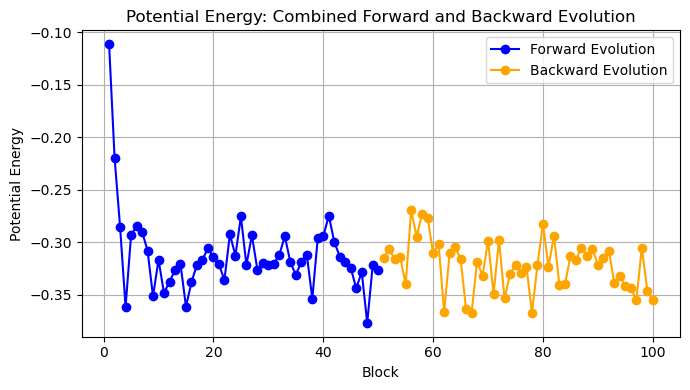

In [12]:
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(combined_blocks[:blocks], potential_forward['ACTUAL_PE:'], label='Forward Evolution', marker='o', color='blue')
ax.plot(combined_blocks[blocks:], potential_backward['ACTUAL_PE:'][::-1], label='Backward Evolution', marker='o', color='orange')

ax.set_title('Potential Energy: Combined Forward and Backward Evolution')
ax.set_xlabel('Block')
ax.set_ylabel('Potential Energy')
ax.grid()
ax.legend()

plt.tight_layout()
plt.show()

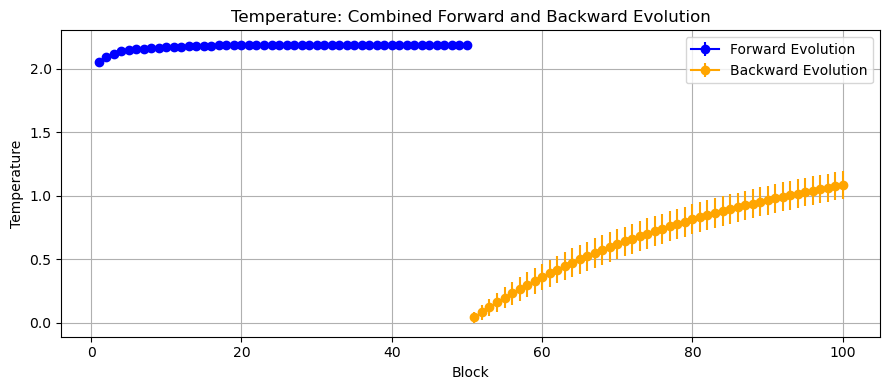

In [13]:
fig, ax = plt.subplots(figsize=(9, 4))

ax.errorbar(combined_blocks[:blocks], temperature_forward['T_AVE:'], yerr=temperature_forward['ERROR:'], label='Forward Evolution', marker='o', color='blue')
ax.errorbar(combined_blocks[blocks:], temperature_backward['T_AVE:'], yerr=temperature_backward['ERROR:'], label='Backward Evolution', marker='o', color='orange')

ax.set_title('Temperature: Combined Forward and Backward Evolution')
ax.set_xlabel('Block')
ax.set_ylabel('Temperature')
ax.grid()
ax.legend()

plt.tight_layout()
plt.show()

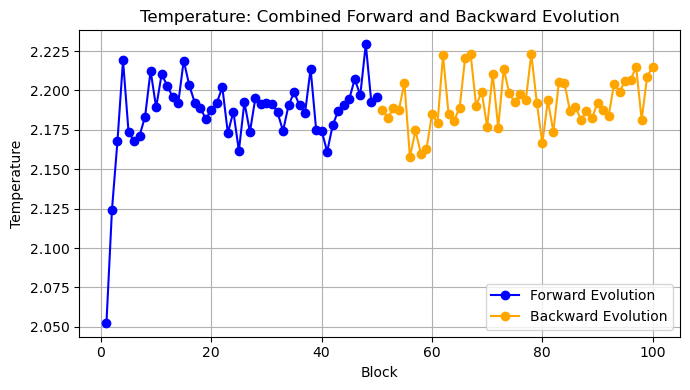

In [14]:
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(combined_blocks[:blocks], temperature_forward['ACTUAL_T:'], label='Forward Evolution', marker='o', color='blue')
ax.plot(combined_blocks[blocks:], temperature_backward['ACTUAL_T:'][::-1], label='Backward Evolution', marker='o', color='orange')

ax.set_title('Temperature: Combined Forward and Backward Evolution')
ax.set_xlabel('Block')
ax.set_ylabel('Temperature')
ax.grid()
ax.legend()

plt.tight_layout()
plt.show()

In [15]:
data2 = pd.read_csv('NSL_SIMULATOR/OUTPUT/pofv.dat', delim_whitespace=True)

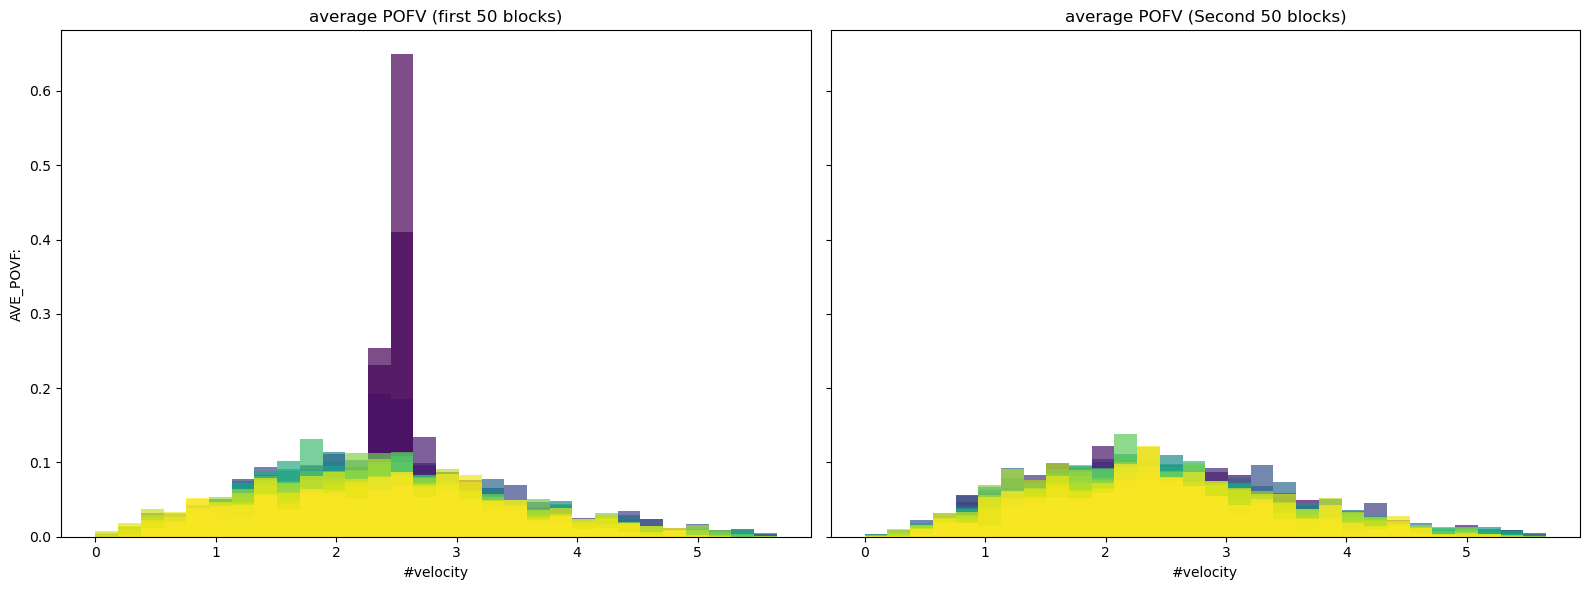

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

num_blocks = 50
colors = cm.viridis(np.linspace(0, 1, num_blocks))
width = data2['#VELOCITY:'][1] - data2['#VELOCITY:'][0]

for i in range(num_blocks):
    start_idx = i * 30
    end_idx = start_idx + 30
    subset = data2.iloc[start_idx:end_idx]

    axes[0].bar(subset['#VELOCITY:'], subset['AVE_POFV:'], alpha=0.7, color=colors[i], label=f'Block {i+1}', width=width)

axes[0].set_title('average POFV (first 50 blocks)')
axes[0].set_xlabel('#velocity')
axes[0].set_ylabel('AVE_POVF:')

for i in range(num_blocks, 2 * num_blocks):
    start_idx = i * 30
    end_idx = start_idx + 30
    subset = data2.iloc[start_idx:end_idx]

    axes[1].bar(subset['#VELOCITY:'], subset['AVE_POFV:'], alpha=0.7, color=colors[i - num_blocks], label=f'Block {i+1}', width=width)

axes[1].set_title('average POFV (Second 50 blocks)')
axes[1].set_xlabel('#velocity')

plt.tight_layout()
plt.show()

In [17]:
total_energy = pd.read_csv('NSL_SIMULATOR/OUTPUT/total_energy.dat', delim_whitespace=True)
total_energy.fillna(0, inplace=True)

total_energy

,#BLOCK:,ACTUAL_TE:,TE_AVE:,ERROR:
0,1,2.96742,2.96742,0.000000
1,2,2.96716,2.96729,0.000092
2,3,2.96697,2.96719,0.000106
3,4,2.96695,2.96713,0.000094
4,5,2.96722,2.96715,0.000077
...,...,...,...,...
95,97,2.96711,1.40709,0.150433
96,98,2.96722,1.42301,0.149737
97,99,2.96712,1.43861,0.149035
98,100,2.96709,1.45389,0.148326


KeyError: 'PE_AVE_FORWARD'

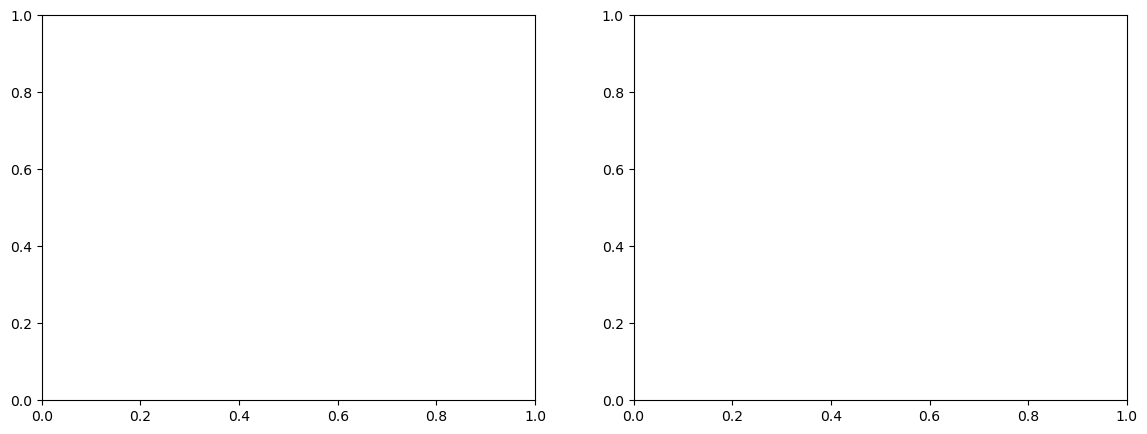

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

combined_blocks = list(range(1, blocks+1)) + list(range(blocks+1, 2*blocks+1))


axs[0].errorbar(combined_blocks[:blocks], total_energy['PE_AVE_FORWARD'], yerr=total_energy['ERROR_FORWARD'], label='Forward Evolution', marker='o', color='blue')
axs[0].errorbar(combined_blocks[blocks:], total_energy['PE_AVE_BACKWARD'], yerr=total_energy['ERROR_BACKWARD'], label='Backward Evolution', marker='o', color='orange')
axs[0].set_title('Total Energy: Forward and Backward Evolution (with errors)')
axs[0].set_xlabel('Block')
axs[0].set_ylabel('Total Energy')
axs[0].grid()
axs[0].legend()

# Secondo plot: Total Energy senza errori
axs[1].plot(combined_blocks[:blocks], total_energy['ACTUAL_PE_FORWARD'], label='Forward Evolution', marker='o', color='blue')
axs[1].plot(combined_blocks[blocks:], total_energy['ACTUAL_PE_BACKWARD'][::-1], label='Backward Evolution', marker='o', color='orange')
axs[1].set_title('Total Energy: Forward and Backward Evolution')
axs[1].set_xlabel('Block')
axs[1].set_ylabel('Total Energy')
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()